In [1]:
install.packages("ggplot2", repos = "https://cran.r-project.org/")
install.packages("ggrepel", repos = "https://cran.r-project.org/") 
install.packages("tidyr", repos = "https://cran.r-project.org/") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library("ggplot2")
library("ggrepel")
library("tidyr")

In [3]:
housing <- read.csv("landdata-states.csv")
head(housing[1:5])

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

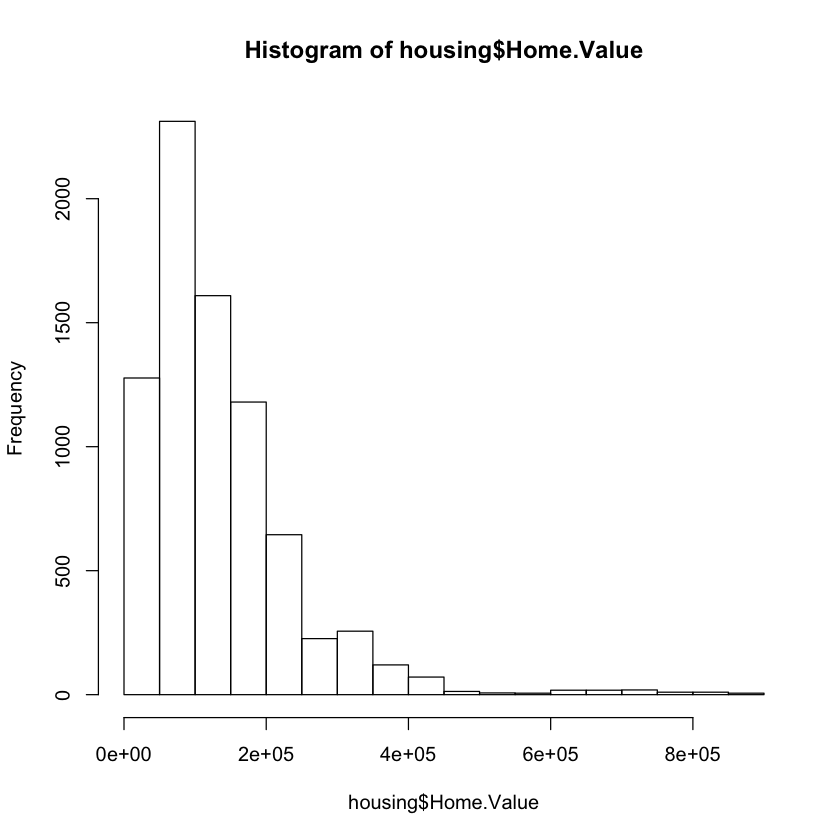

In [4]:
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


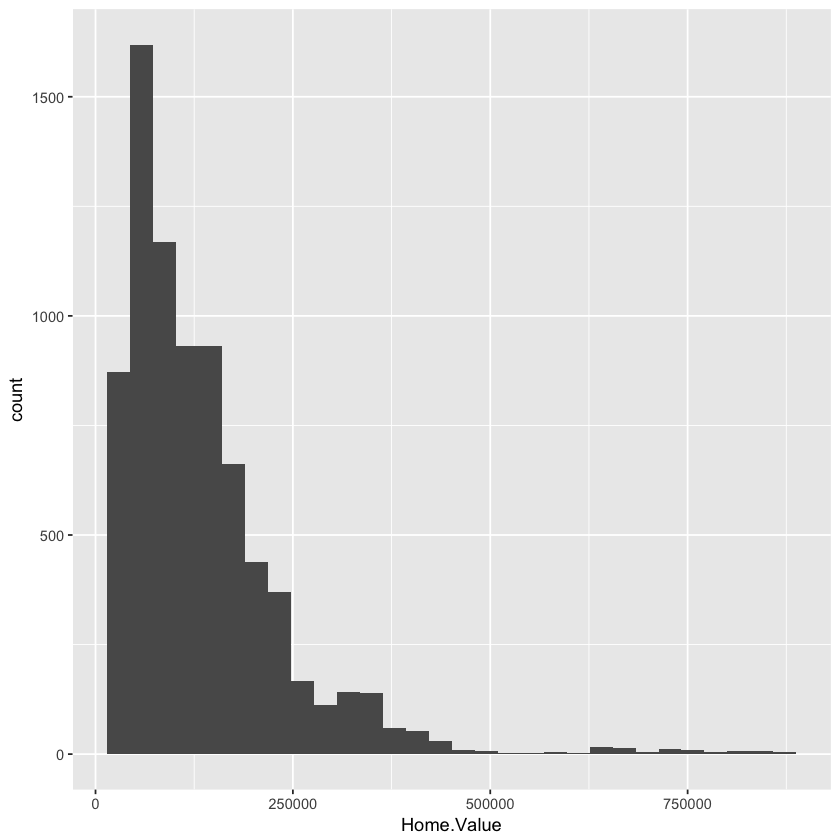

In [5]:
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

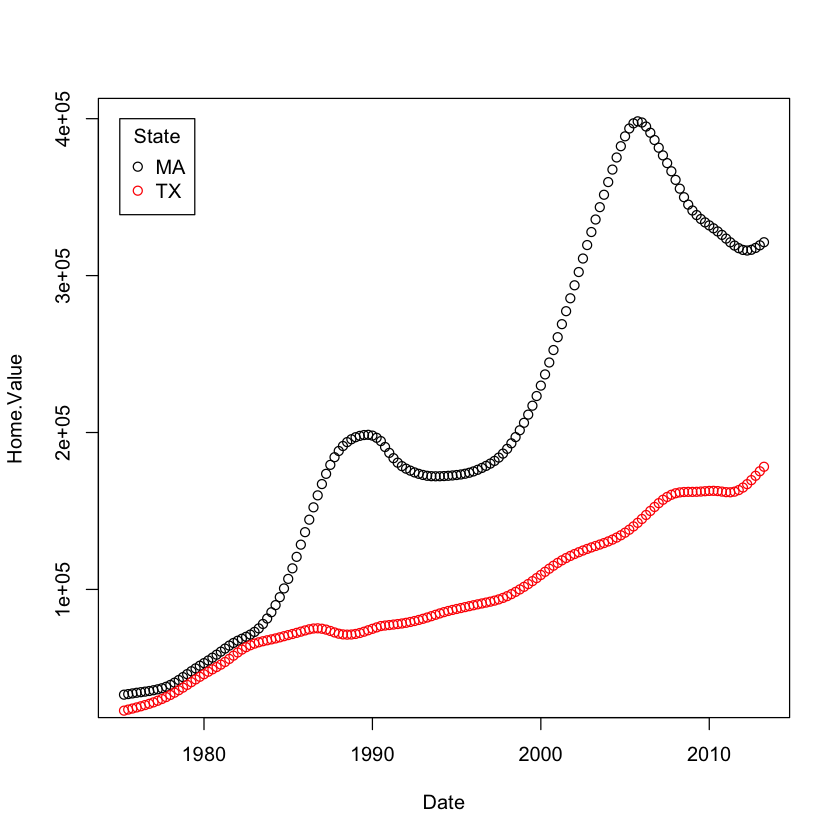

In [6]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

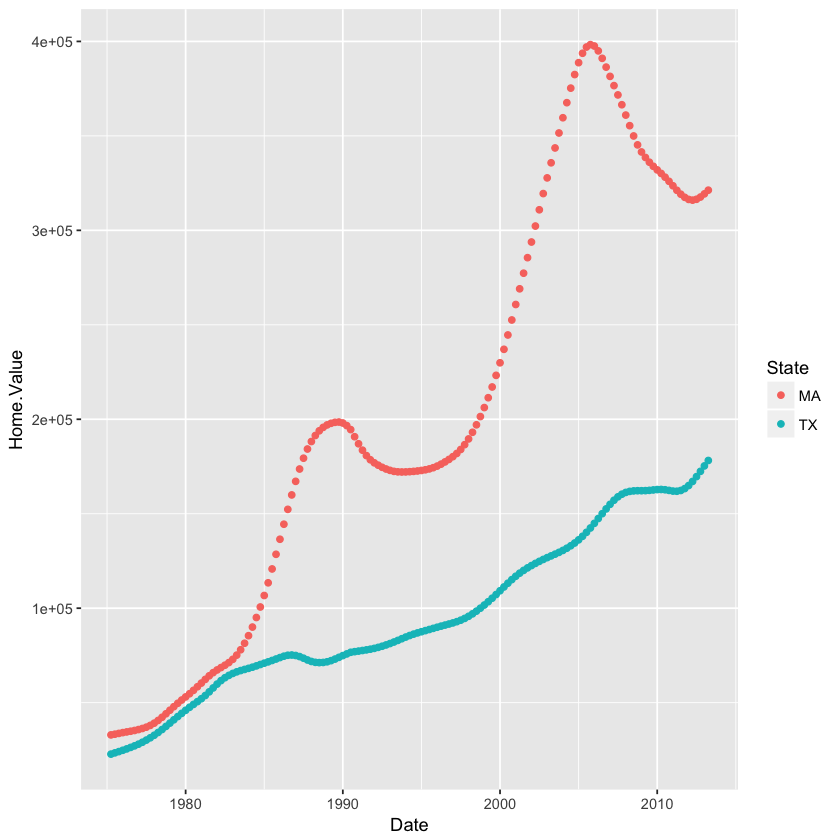

In [7]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

In [12]:
help.search("geom_", package = "ggplot2")

starting httpd help server ... done


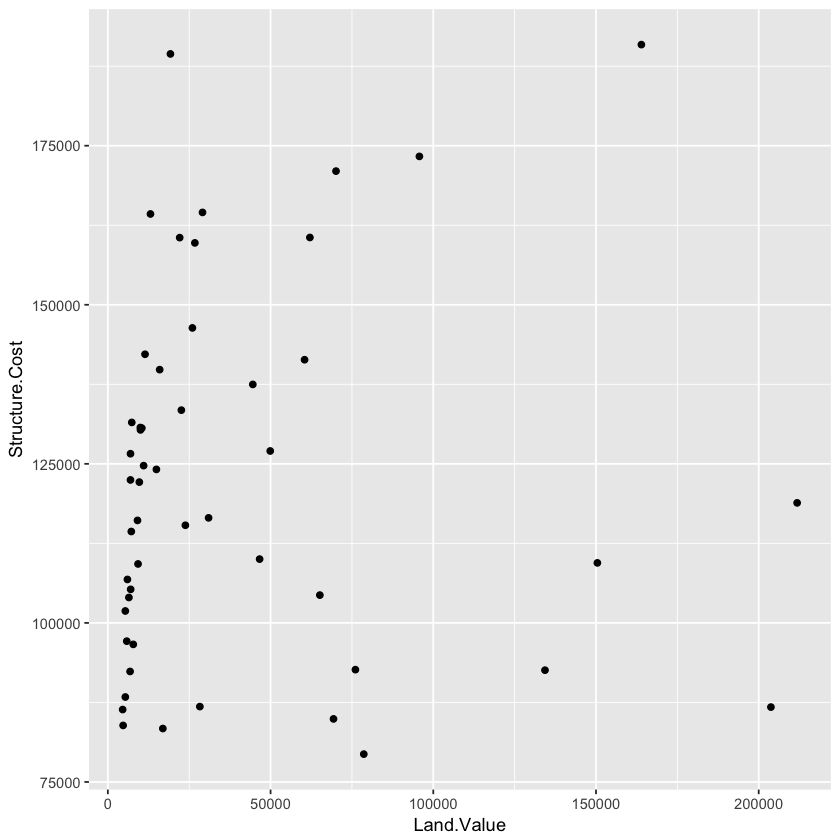

In [8]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

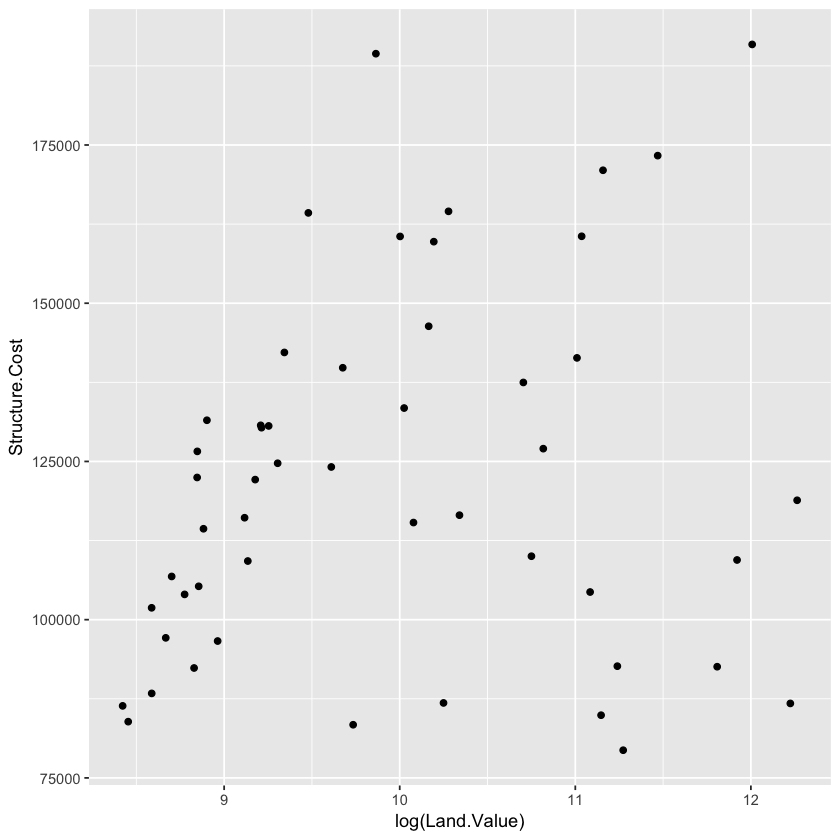

In [9]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

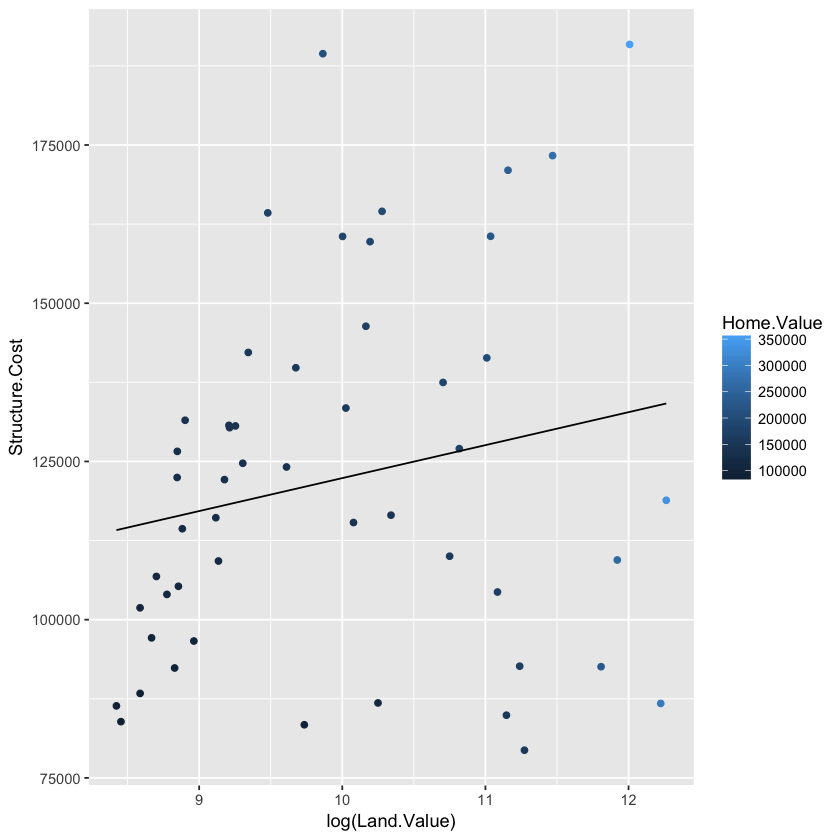

In [10]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

`geom_smooth()` using method = 'loess'


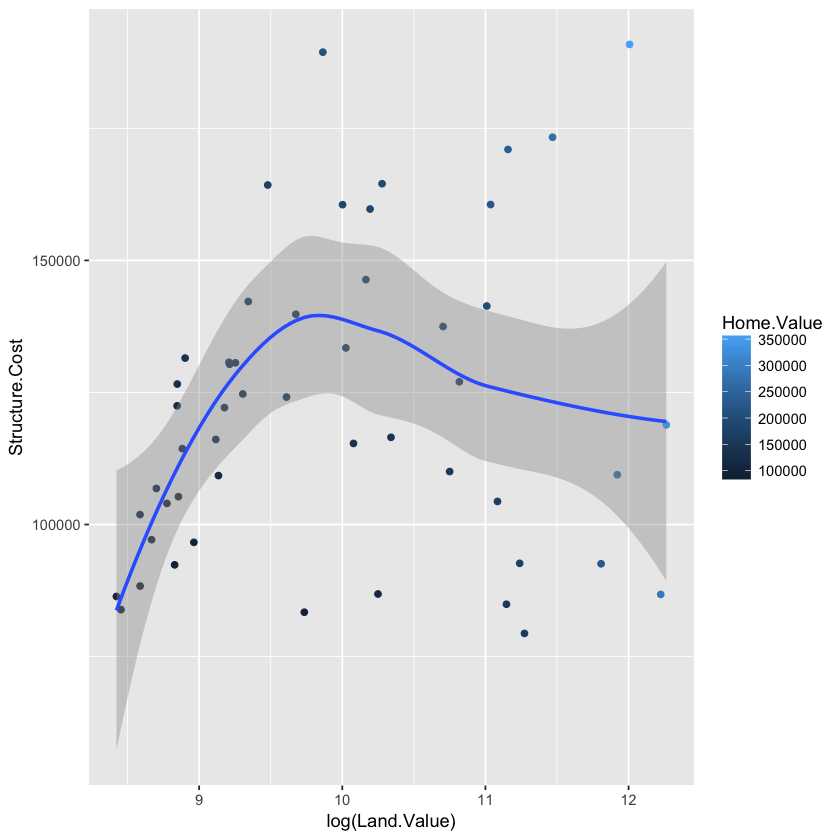

In [11]:
p1 + geom_point(aes(color = Home.Value)) +
  geom_smooth()

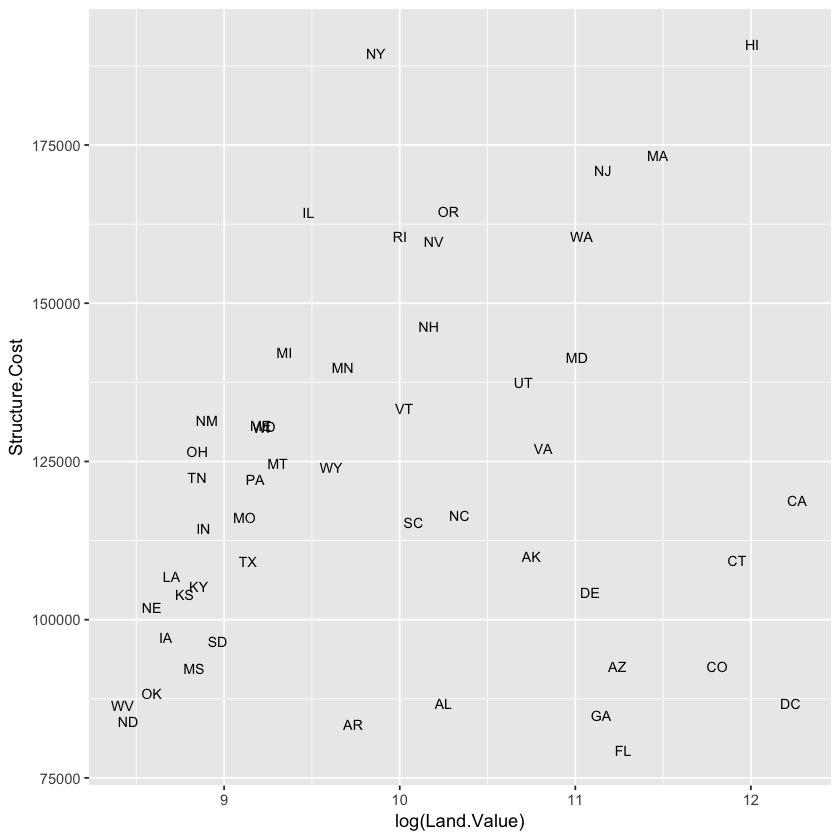

In [12]:
p1 + geom_text(aes(label=State), size = 3)

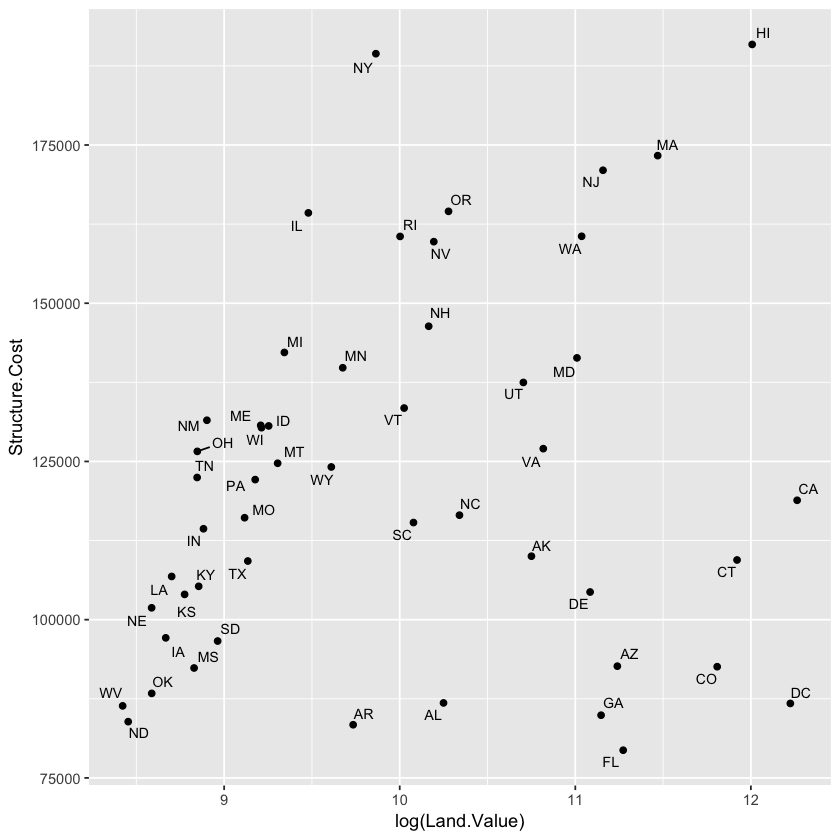

In [13]:
p1 + geom_point() + 
  geom_text_repel(aes(label=State), size = 3)

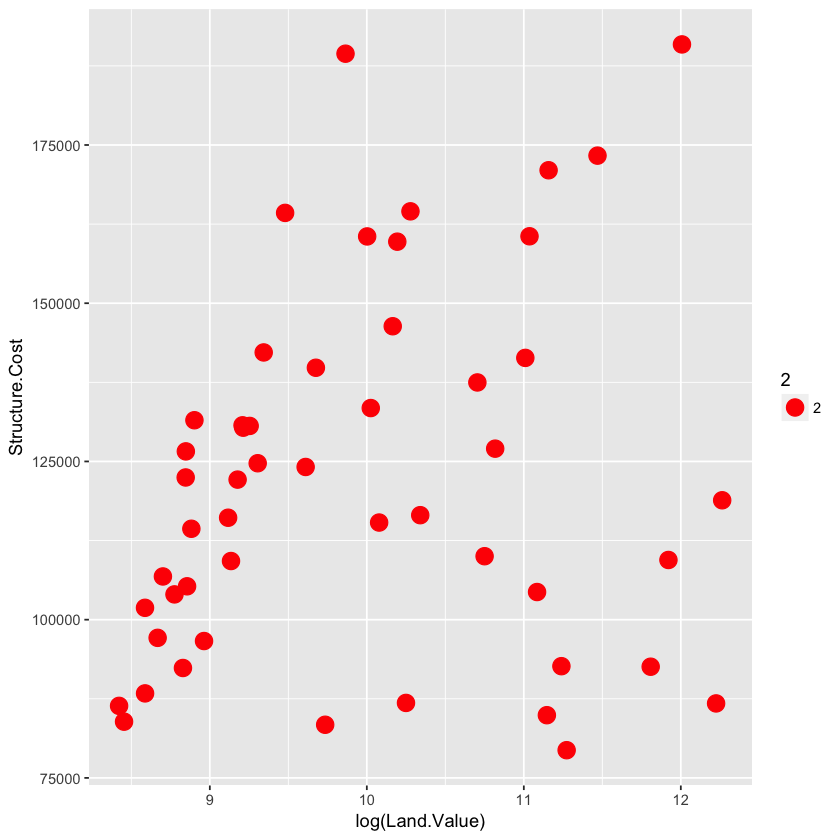

In [14]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable
             color="red") # this is fine -- all points red

Warning message:
“Removed 1 rows containing missing values (geom_point).”

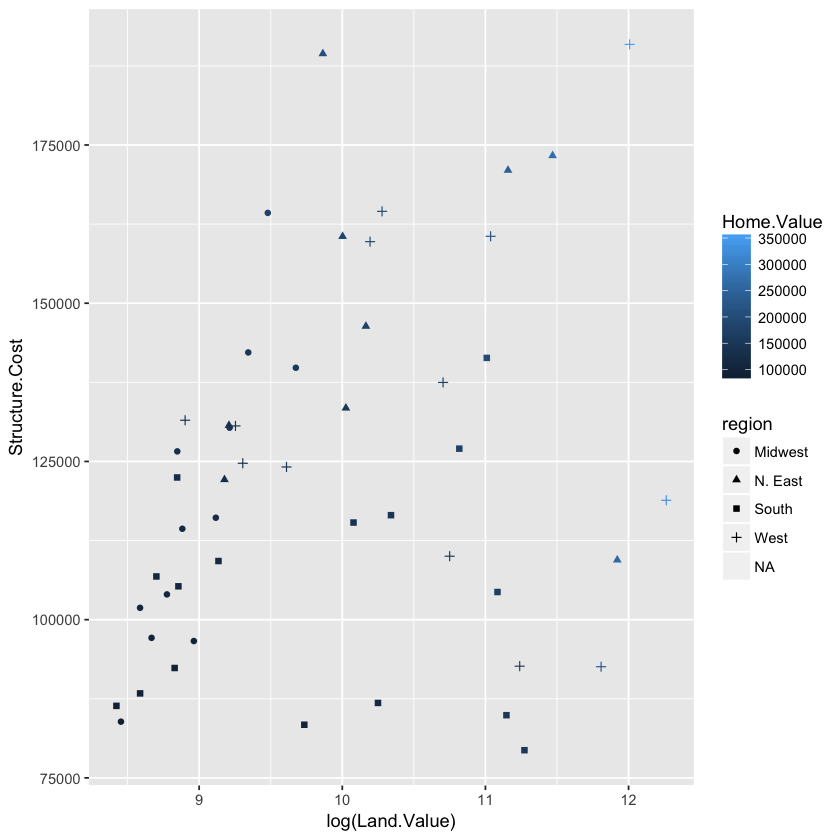

In [15]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

X Country     HDI.Rank HDI   CPI Region           
1 1 Afghanistan 172      0.398 1.5 Asia Pacific     
2 2 Albania      70      0.739 3.1 East EU Cemt Asia
3 3 Algeria      96      0.698 2.9 MENA             
4 4 Angola      148      0.486 2.0 SSA              
5 5 Argentina    45      0.797 3.0 Americas         
6 6 Armenia      86      0.716 2.6 East EU Cemt Asia

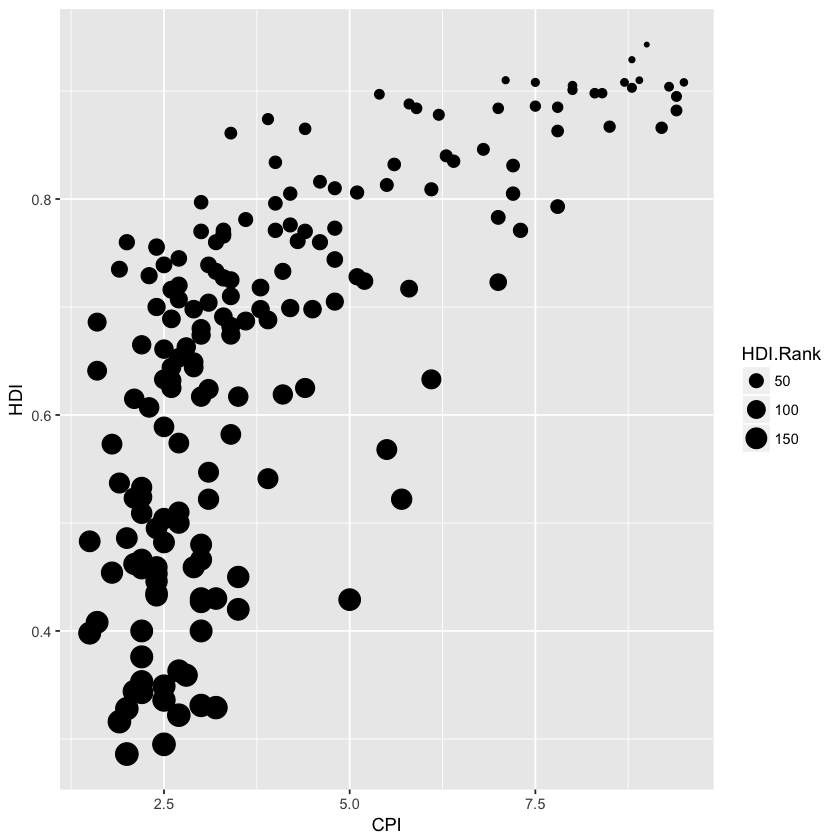

In [16]:
dat <- read.csv("EconomistData.csv")
head(dat)

ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


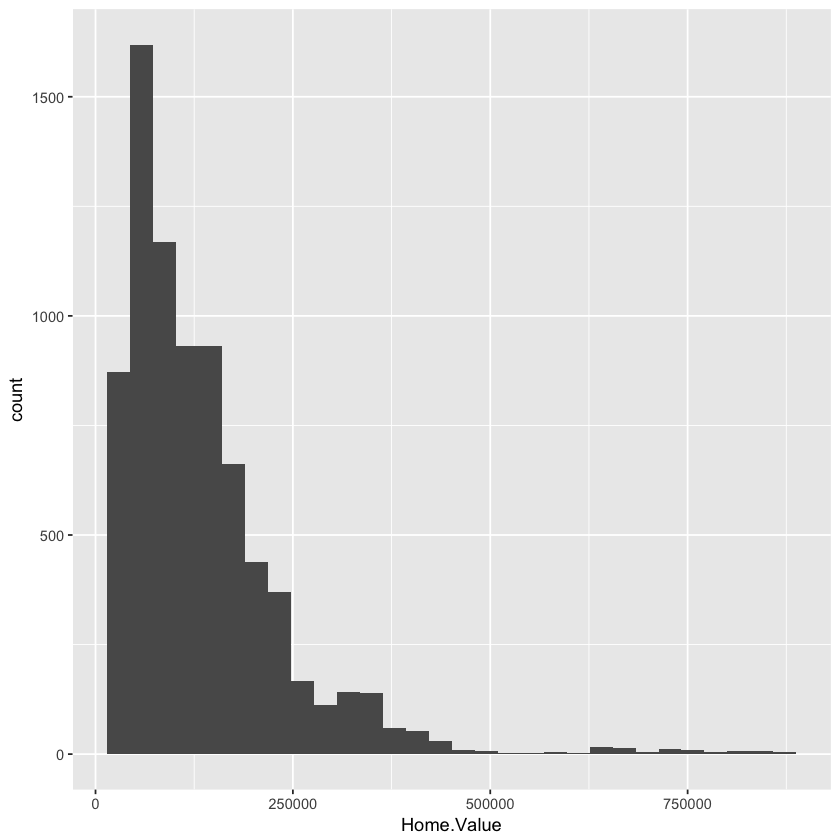

In [17]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

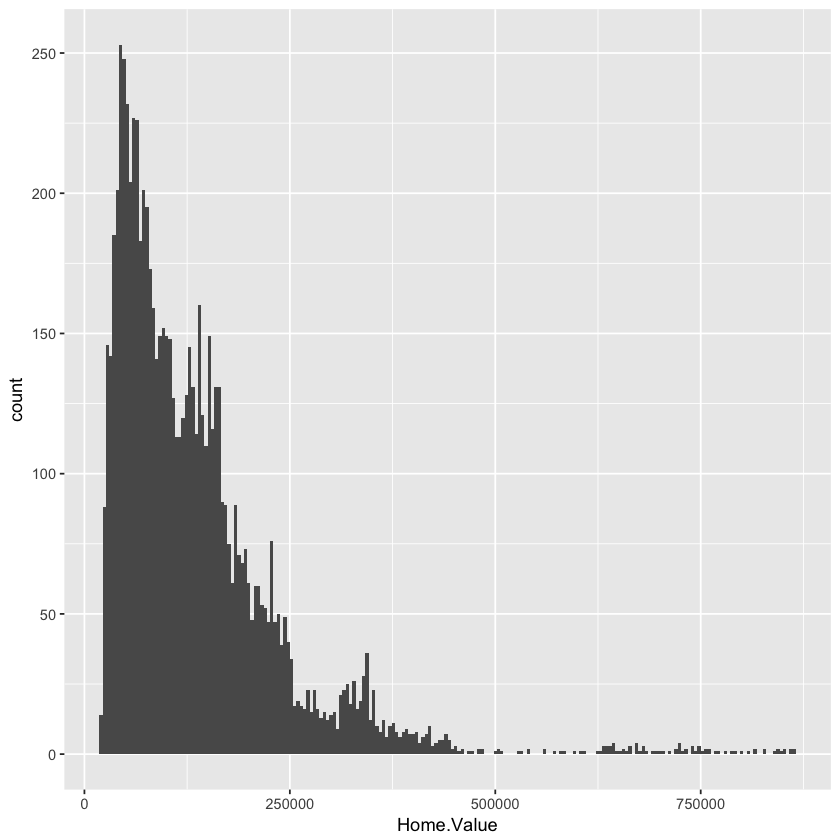

In [18]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

In [19]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

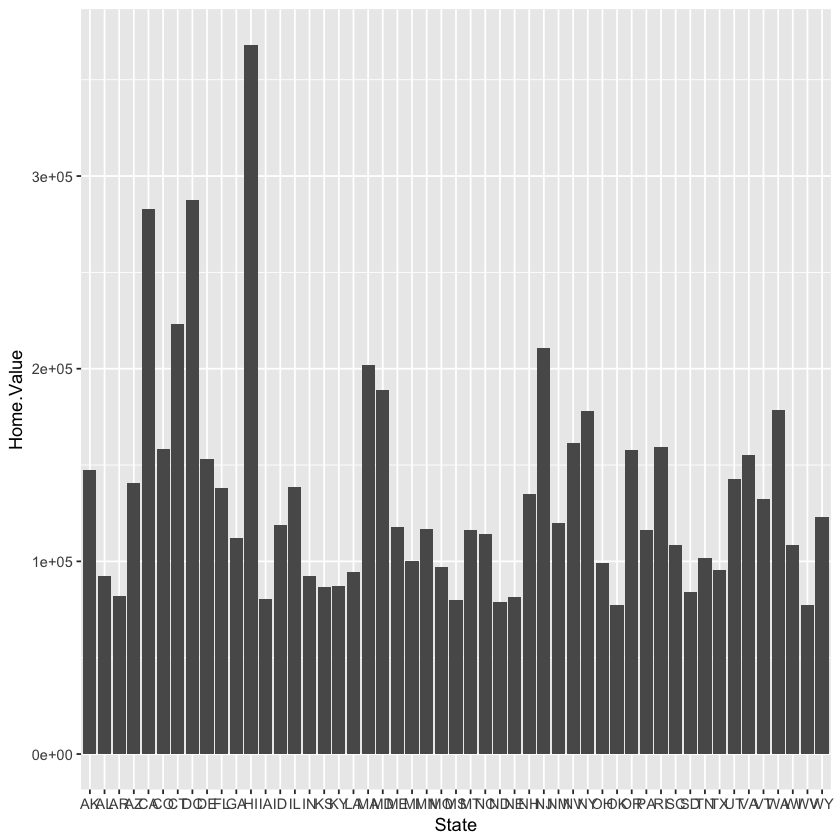

In [20]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")

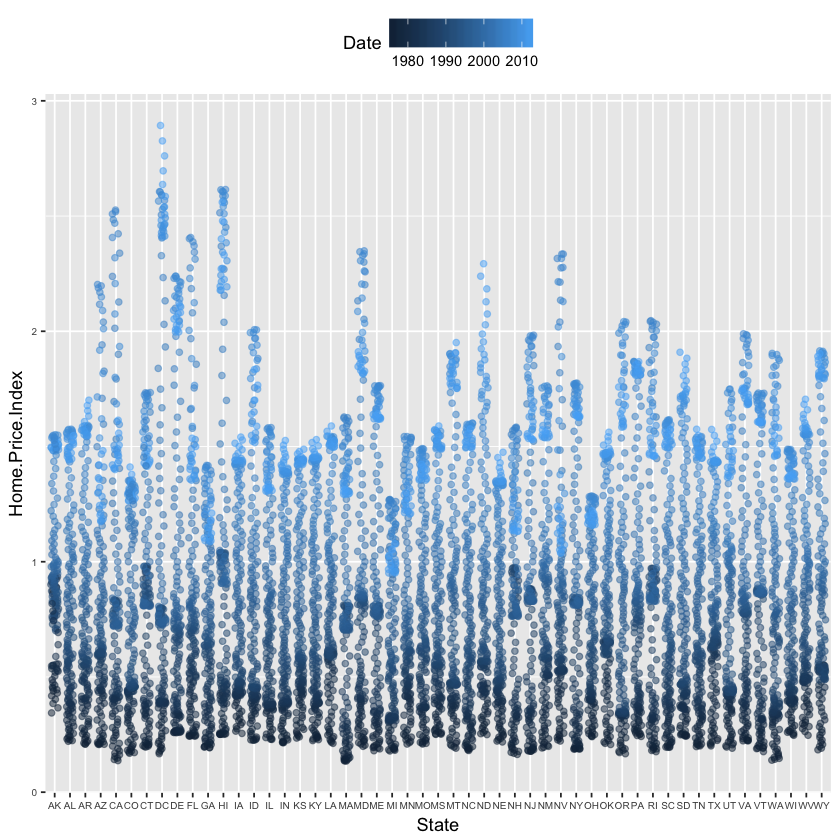

In [21]:
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

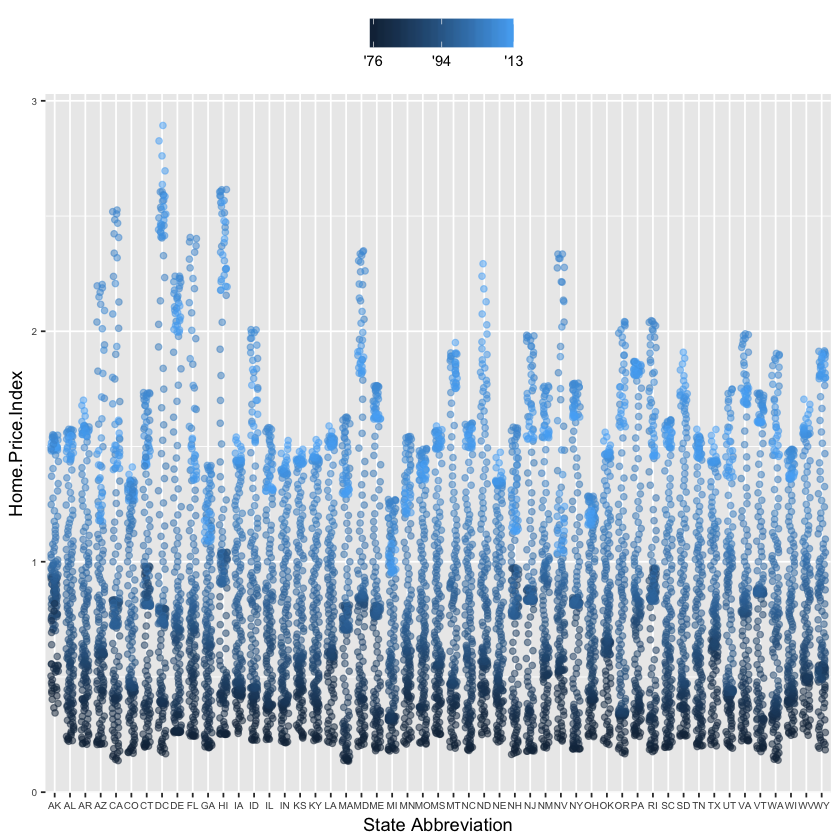

In [22]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

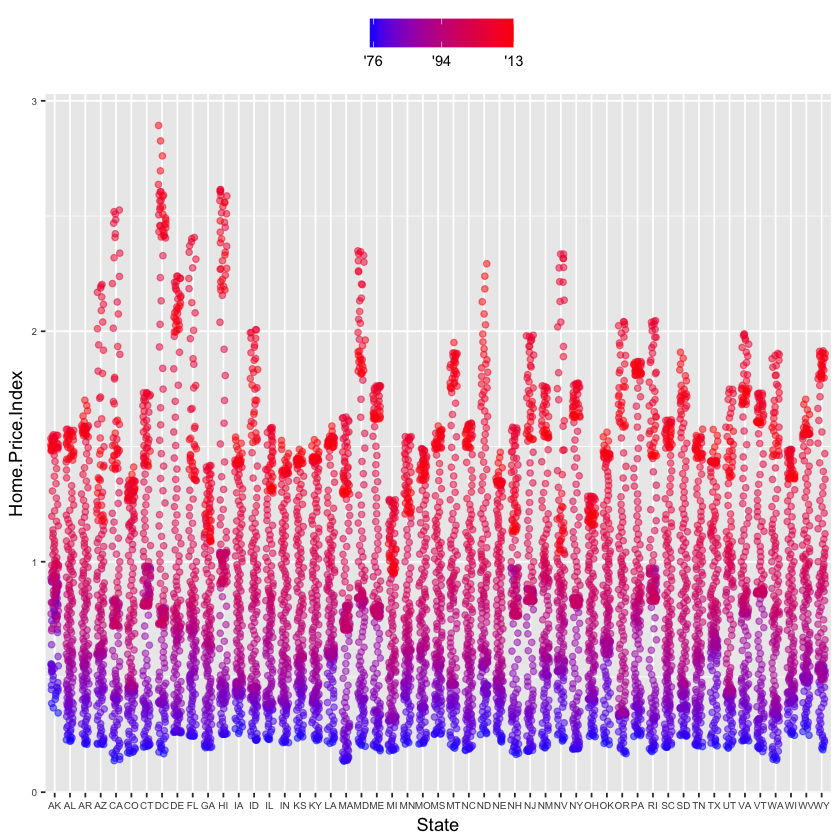

In [23]:
p4 + scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

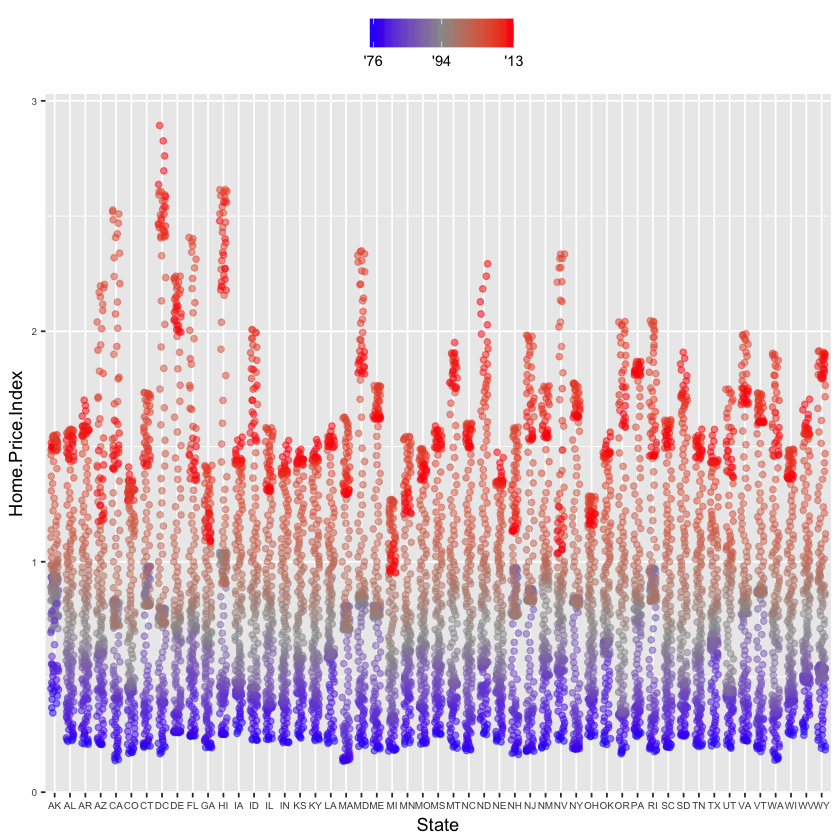

In [24]:
p4 + scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = "blue",
                        high = "red",
                        mid = "gray60",
                        midpoint = 1994)

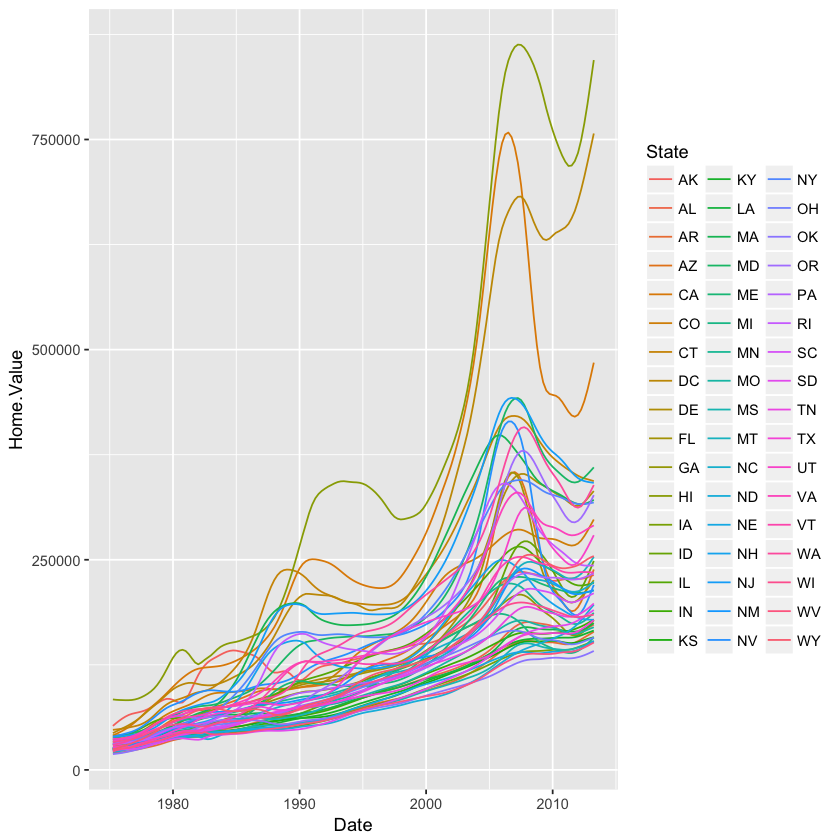

In [25]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

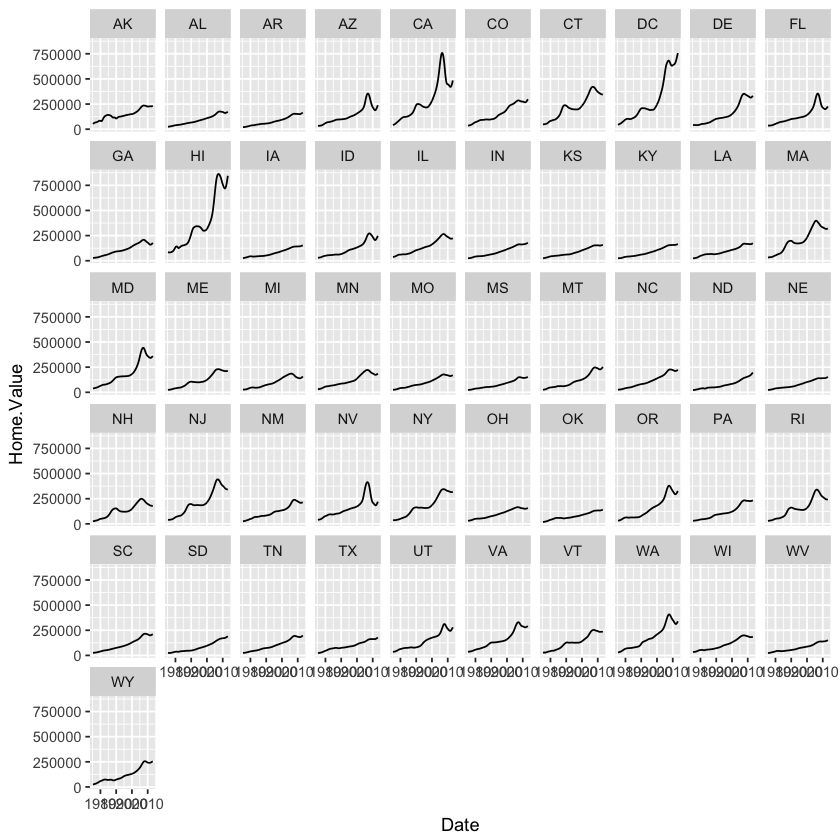

In [26]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

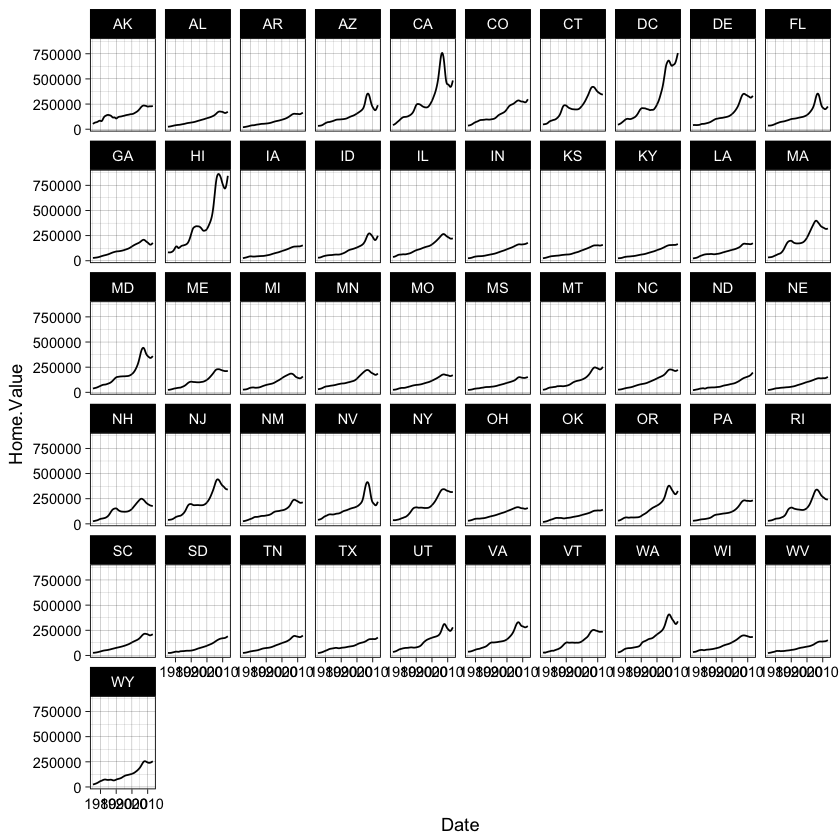

In [27]:
p5 + theme_linedraw()

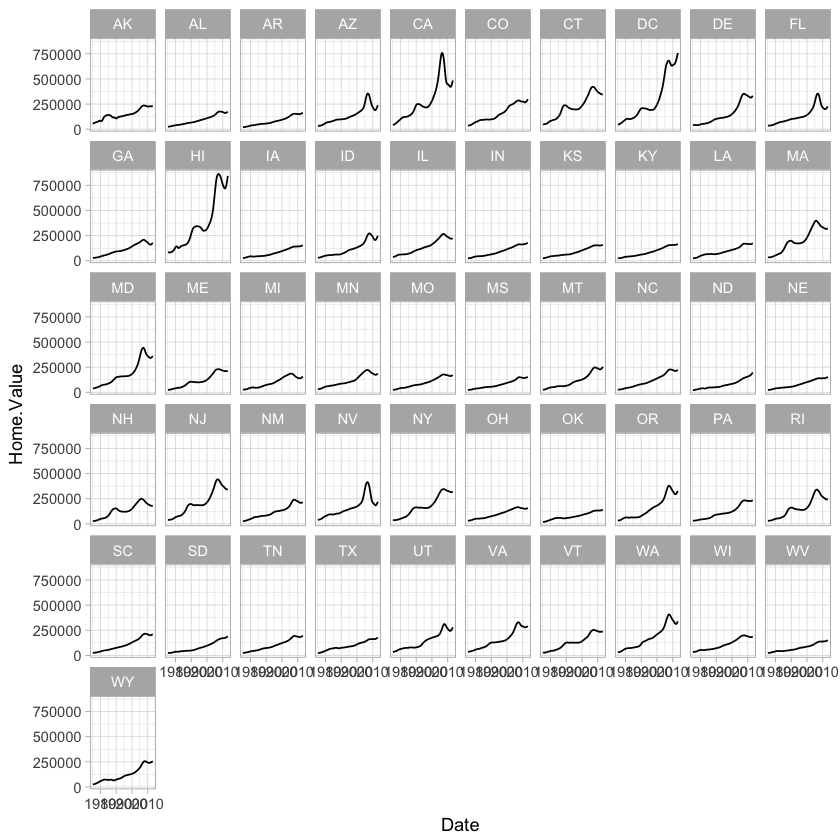

In [28]:
p5 + theme_light()

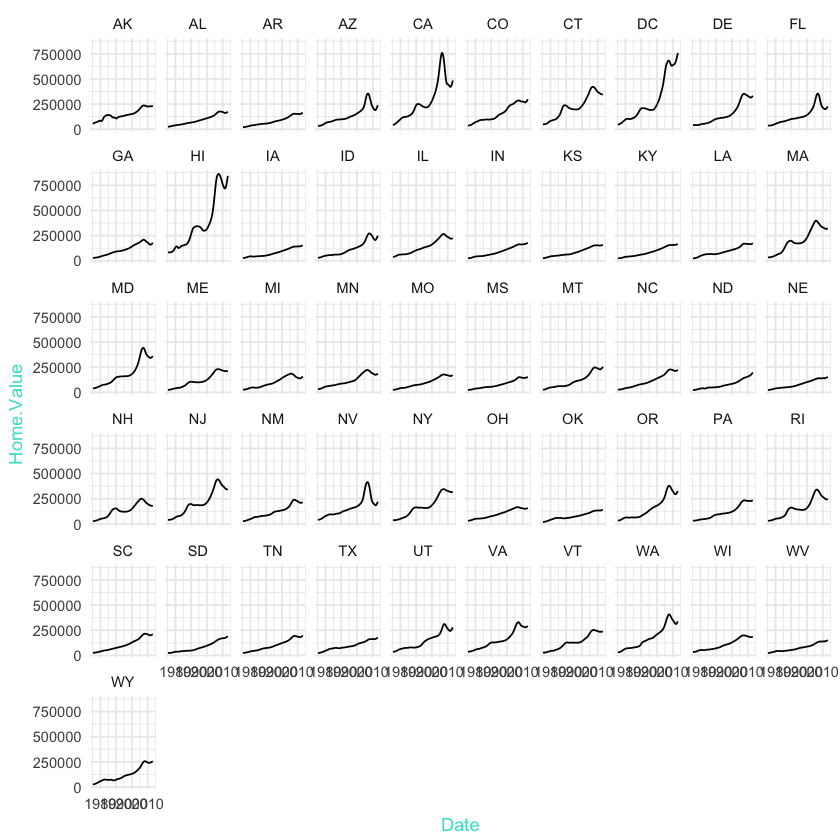

In [29]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

In [30]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = "orange"))

p5 + theme_new

Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Serif' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Serif' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Serif' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Serif' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Serif' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Serif' not found in PostScript font database”Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Serif' not found in PostScript font database”Warning messa

ERROR: Error in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : polygon edge not found


plot without title

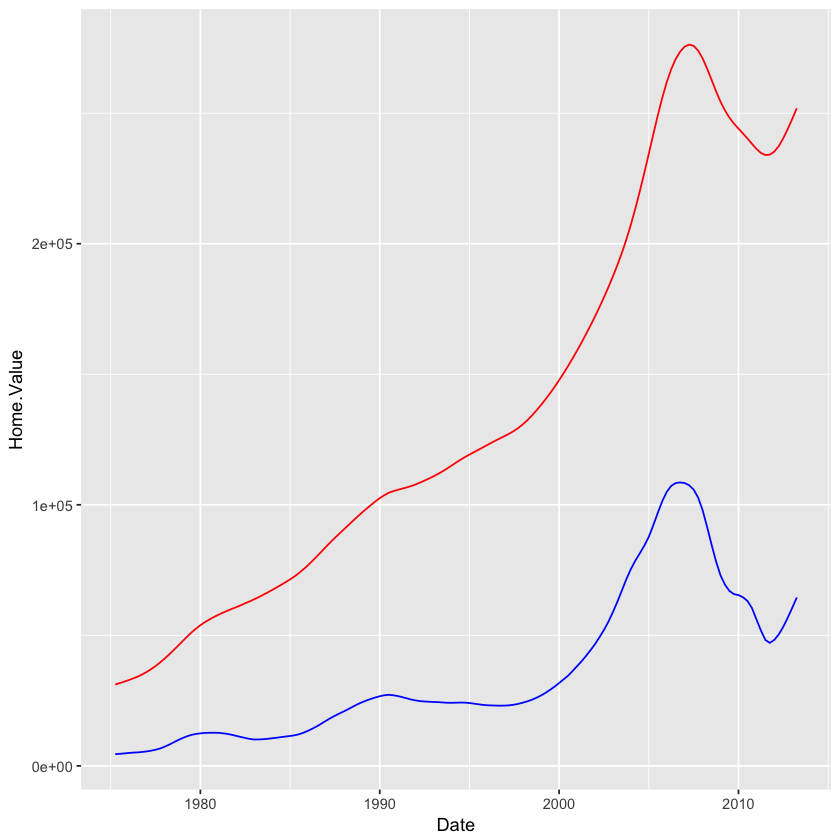

In [31]:
housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
ggplot(housing.byyear,
       aes(x=Date)) +
  geom_line(aes(y=Home.Value), color="red") +
  geom_line(aes(y=Land.Value), color="blue")

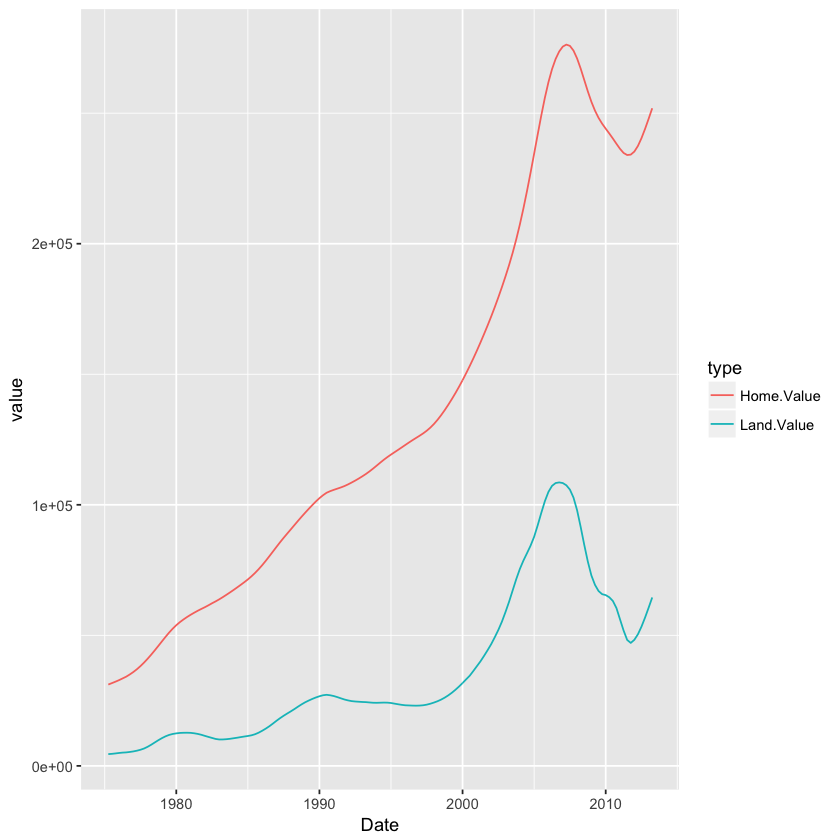

In [32]:
home.land.byyear <- gather(housing.byyear,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()

# References:

#### http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html